# More on arrays

## Table of Contents
* [The `find` function](#find_function)
* [Tables using arrays](#tables_using_arrays)
* [Data manipulation](#data_manipulation)

In [23]:
clear, format short g, format compact

<a id='find_function'></a>
## The `find` function


### Vectors

The `find` function locates all the elements of a certain array satisfying simples conditions. Let's begin by examining the following simples exampls. 

In [30]:
nrs = randi(20, 1, 12) - 10 
nrs_orig = nrs; % save the original data

nrs =
     6    -4     1     4     8    10     1    -7    -7    -4     7    -4


**Task 1.** Find the indices of all elements which are negative.

In [31]:
ind1 = find(nrs < 0)

ind1 =
     2     8     9    10    12


**Task 2.** Find the indices of all nonnegative elements.

In [32]:
ind2 = find(nrs >= 0)

ind2 =
     1     3     4     5     6     7    11


**Task 3.** Find the number of 1's.

In [33]:
ind3 = find(nrs == 1); % note the use of ==
length(ind3)

ans =
     2


**Task 4.** Print out all the elements which are greater than $-5$.

In [34]:
ind4 = find(nrs > -5);
nrs(ind4)

ans =
     6    -4     1     4     8    10     1    -4     7    -4


**Task 5.** Replace all the elements which are less than or equal to $-5$ by $-5$.

In [35]:
ind5 = find(nrs <= -5);
nrs(ind5) = -5

nrs =
     6    -4     1     4     8    10     1    -5    -5    -4     7    -4


### Matrices
The function can also be applied to matrices. 

In [52]:
Nrs = randi(20, 2, 6) - 10
Nrs_orig = Nrs;

Nrs =
     4     0    -5    -6     1    -8
     5    -8     9     7    10    -1


Let's locate the elements that are greater than $0$.

In [53]:
ij = find(Nrs > 0)

ij =
     1
     2
     6
     8
     9
    10


Note that the output is a list of *scalar* indices, not of the standard *2-vector* indices of matrices like $(1,3)$. The reason is that these indices apply to the column vector obtained from `Nrs` using the colon operator:

In [54]:
Nrs(:)

ans =
     4
     5
     0
    -8
    -5
     9
    -6
     7
     1
    10
    -8
    -1


To locate these elements visually, let's replace them by 200.

In [55]:
Nrs(ij) = 200;
Nrs

Nrs =
   200     0    -5    -6   200    -8
   200    -8   200   200   200    -1


**Warning.** The syntax
```
>> [i, j] = find(.....)
```
also works, but it is not recommended for use. Stick with
```
>> ij = find(.....)
```

As an illustration, let's re-do what we did above.

In [58]:
Nrs = Nrs_orig; % recover original
[i, j] = find(Nrs > 0);
Nrs(i,j) = 200;
Nrs

Nrs =
   200     0   200   200   200    -8
   200    -8   200   200   200    -1


This obviously is different from the previous result. (In some rare cases, your answer may be the same as above, but in general it will not be.)

What do you think is happening?

<a id='tables_using_arrays'></a>
## Tables using arrays

Here, we revisit the Stirling's formula example. 

**Example (Stirling).** Calculate $n!$ for $n = 2, 4, 6, \ldots, 20$ using both `factorial` and the Stirling's formula and calculate absolute and relative errors. Then tabulate the results. 

In [61]:
n = 20;
n_vec = (2:2:n)';
fact = factorial(n_vec);
stir = sqrt(2*pi*n_vec).*(n_vec/exp(1)).^(n_vec);
abs_err = stir - fact;
rel_err = stir./fact - 1;
T = [n_vec, fact, stir, abs_err, rel_err];
disp('            n           n!     stirling      abs_err      rel_err');
format compact;
format short g;
disp(T);

            n           n!     stirling      abs_err      rel_err
            2            2        1.919    -0.080996    -0.040498
            4           24       23.506     -0.49382    -0.020576
            6          720       710.08      -9.9218     -0.01378
            8        40320        39902       -417.6    -0.010357
           10   3.6288e+06   3.5987e+06       -30104    -0.008296
           12     4.79e+08   4.7569e+08  -3.3141e+06   -0.0069188
           14   8.7178e+10   8.6661e+10  -5.1729e+08   -0.0059337
           16   2.0923e+13   2.0814e+13  -1.0868e+11   -0.0051941
           18   6.4024e+15   6.3728e+15  -2.9569e+13   -0.0046185
           20   2.4329e+18   2.4228e+18  -1.0115e+16   -0.0041577


Note we logged all the results in a single matrix and used the `disp` function once to output all of them. The header positions (line 8) were obtained by trial and error.

**Example (Distance).** Suppose we sample $n$ points on the curve $y = x + \sin(2 \pi x)$ for $n$ equally spaced points $x_j$ in $[0,1]$. Tabulate the distance between adjacent points $(x_{j+1}, y_{j+1})$ and $(x_j, y_j)$ for $1 \le j \le n-1$. 

In [81]:
n = 11;
x = linspace(0, 1, n)';
y = x + sin(2*pi*x);
dx = x(2:end) - x(1:end-1);
dy = y(2:end) - y(1:end-1);
ds = sqrt(dx.^2 + dy.^2);
T = [[1:n-1]', x(1:end-1), ds];
format compact;
format short g;
disp(' n           x          ds')
disp(num2str(T, 5))
disp(num2str([n, x(end)], 5))

 n           x          ds
 1           0     0.69502
 2         0.1     0.47394
 3         0.2     0.14142
 4         0.3     0.28162
 5         0.4     0.49793
 6         0.5     0.49793
 7         0.6     0.28162
 8         0.7     0.14142
 9         0.8     0.47394
10         0.9     0.69502
11           1


Note in line 11 and 12 that we used `num2str` to turn arrays of numbers into those of character strings. The intension was to align columns of two arrays with different dimensions. See what I mean by replacing the two lines by
```
disp(T)
disp([n, x(end)])
```

The result above can be visualized using `plot` as well. For example:

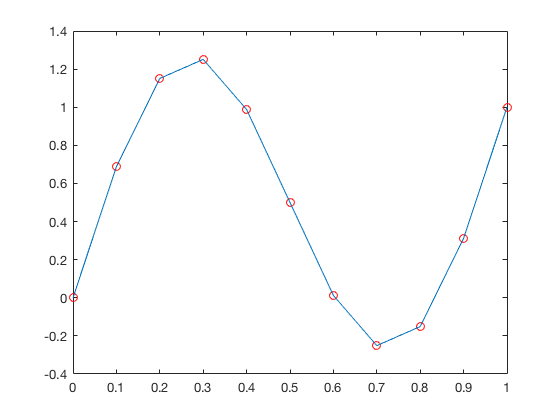

In [82]:
plot(x, y, 'ro')
hold on 
plot(x, y)

<a id='data_manipulation'></a>
## Data manipulation

In this section, we showcase MATLAB functions suitable for data manipulation. 

First, download [data file](data/some_data.dat "some_data.dat") into your current directory.